# 张量

## 1. 创建tensor

In [1]:
# 随机初始化
import torch
x = torch.rand(4, 3) 
print(x)

tensor([[0.3461, 0.9185, 0.6457],
        [0.4215, 0.5736, 0.6721],
        [0.5281, 0.8873, 0.8807],
        [0.4471, 0.1763, 0.6430]])


In [2]:
# 全0矩阵
import torch
x = torch.zeros(4, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


torch.zero_()和torch.zeros_like()将现有矩阵转换为全0矩阵

In [3]:
# 直接构建张量
import torch
x = torch.tensor([5.5, 3]) 
print(x)

tensor([5.5000, 3.0000])


In [4]:
# 基于已经存在的tensor创建新的tensor
x = x.new_ones(4, 3, dtype=torch.double) 
# 创建一个新的全1矩阵tensor，返回的tensor默认具有相同的torch.dtype和torch.device
# 也可以像之前的写法 x = torch.ones(4, 3, dtype=torch.double)
print(x)
x = torch.randn_like(x, dtype=torch.float)
# 重置数据类型
print(x)
# 结果会有一样的size
# 获取它的维度信息
print(x.size())
print(x.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.6227, -1.2274,  0.7571],
        [ 0.0414,  0.4613,  0.8278],
        [-0.7981,  0.0093,  0.3272],
        [ 0.1302, -0.6149,  0.0486]])
torch.Size([4, 3])
torch.Size([4, 3])


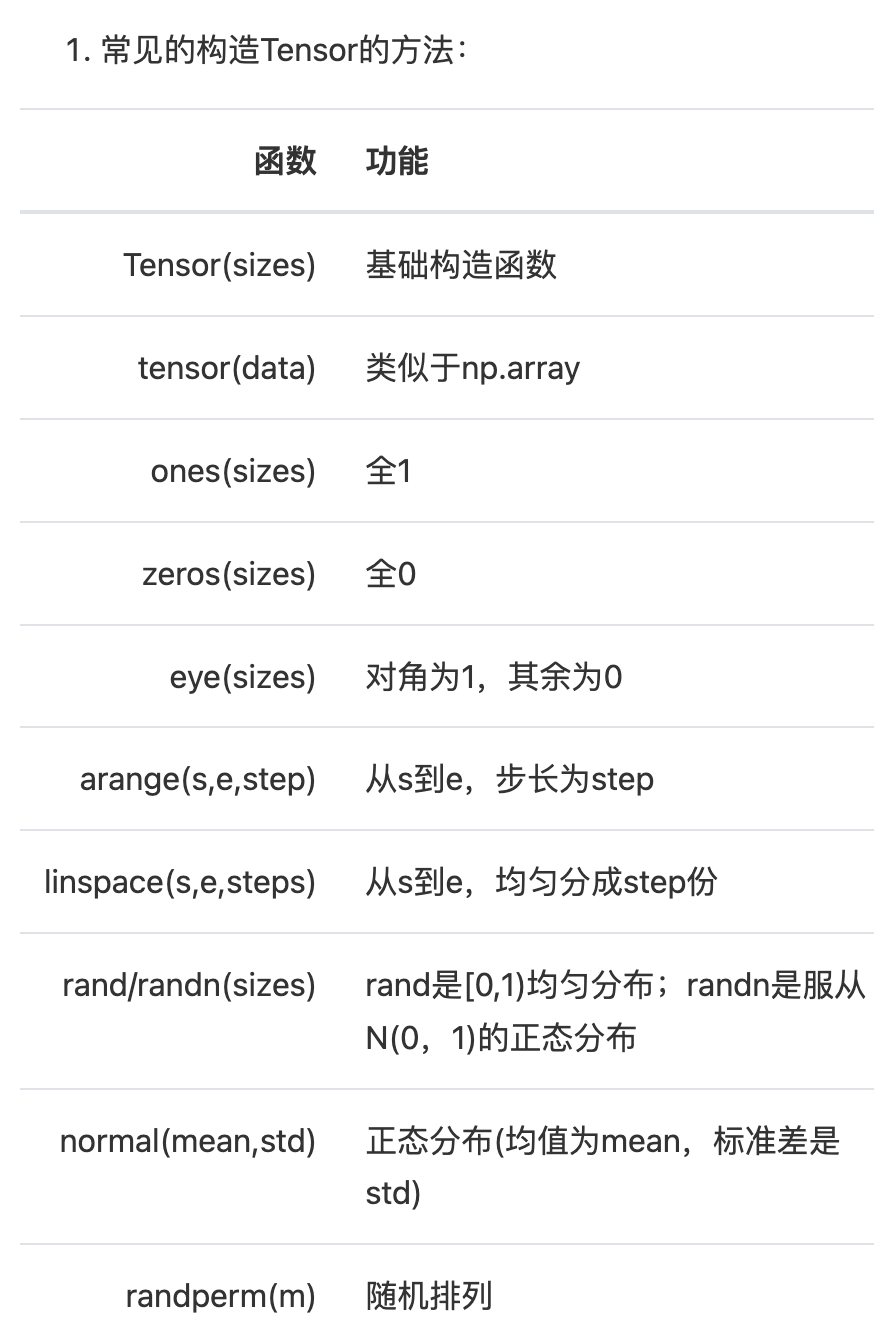

## 2. 张量操作

In [5]:
# 加法
import torch
# 方式1
y = torch.rand(4, 3) 
print(x + y)

# 方式2
print(torch.add(x, y))

# 方式3 in-place，原值修改
y.add_(x) 
print(y)


tensor([[ 2.4104, -0.3323,  1.6482],
        [ 0.0761,  1.4470,  1.6770],
        [-0.0530,  0.3134,  0.8683],
        [ 0.2454, -0.3906,  0.9914]])
tensor([[ 2.4104, -0.3323,  1.6482],
        [ 0.0761,  1.4470,  1.6770],
        [-0.0530,  0.3134,  0.8683],
        [ 0.2454, -0.3906,  0.9914]])
tensor([[ 2.4104, -0.3323,  1.6482],
        [ 0.0761,  1.4470,  1.6770],
        [-0.0530,  0.3134,  0.8683],
        [ 0.2454, -0.3906,  0.9914]])


In [6]:
# 索引
# 索引出来的结果与原数据共享内存，也即修改一个，另一个会跟着修改
import torch
x = torch.rand(4,3)
# 取第二列
print(x[:, 1])

tensor([0.5950, 0.6832, 0.5302, 0.2197])


In [7]:
y = x[0,:]
y += 1
print(y)
print(x[0, :]) # 源tensor也被改了了

tensor([1.6075, 1.5950, 1.3491])
tensor([1.6075, 1.5950, 1.3491])


In [8]:
# 维度变换
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # -1是指这一维的维数由其他维度决定
print(x.size(), y.size(), z.size())

# 共享内存，修改一个，另一个也会改变

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [9]:
x += 1
print(x)
print(y) # 也加了了1

tensor([[ 0.0849,  0.7841,  2.8992,  1.6971],
        [-0.0541,  2.4144,  1.5495,  1.6866],
        [ 0.4818, -0.2170, -0.1368,  2.9701],
        [ 1.2630,  1.0254,  0.8687,  2.1257]])
tensor([ 0.0849,  0.7841,  2.8992,  1.6971, -0.0541,  2.4144,  1.5495,  1.6866,
         0.4818, -0.2170, -0.1368,  2.9701,  1.2630,  1.0254,  0.8687,  2.1257])


In [10]:
import torch
x = torch.randn(1) 
print(x)
print(type(x)) 
print(x.item()) # 只有一个元素的tensor可以用item得到元素值
print(type(x.item()))

tensor([1.5975])
<class 'torch.Tensor'>
1.5974563360214233
<class 'float'>


## 3. 广播机制

In [11]:
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


In [12]:
torch.arange(1, 6)

tensor([1, 2, 3, 4, 5])